In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from math import sqrt
rcParams['figure.figsize'] = 15, 6

In [ ]:
ds=pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
ds.isnull().values.any()
ds.dropna()
ds

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
187119,1336545060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187120,1336545120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187121,1336545180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187122,1336545240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds['Date'] = pd.to_datetime(ds['Timestamp'],unit='s').dt.date
ds['Price'] = (ds['High']+ ds['Low'])/2
group = ds.groupby('Date')
Daily_Price = group['Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.473750
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.211667
Name: Price, dtype: float64

In [ ]:
new_ds= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Price"])

In [ ]:

new_ds.head()

,Price
Date,
2011-12-31,4.473750
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.211667


(array([734503., 734524., 734534., 734555., 734563., 734584., 734594.,
        734615., 734624.]), <a list of 9 Text major ticklabel objects>)

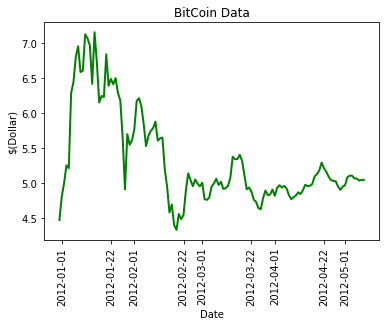

In [ ]:
plt.plot(new_ds,color='green', lw=2)
plt.title("BitCoin Data")
plt.xlabel('Date')
plt.ylabel('$(Dollar)')
plt.xticks(rotation='vertical')

In [ ]:
ds=new_ds
forecast_out = int(20)

ds['Prediction'] = ds[['Price']].shift(-forecast_out)

X = np.array(ds.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(ds['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

clf = LinearRegression()
clf.fit(X_train,y_train)
cross_validation = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("score ", score)
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

score  0.16310443171338151
[5.10124632 5.13213905 5.10993152 5.09604129 5.07679424 5.06373062
 5.06071536 5.05936582 5.03836408 5.02567589 5.03879388 5.04356721
 5.0753321  5.08102213 5.08112426 5.07033918 5.06962628 5.06227768
 5.06468313 5.06468313]


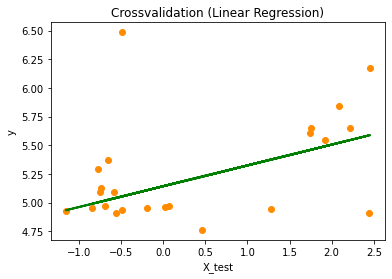

In [ ]:

# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='test_data')
plt.plot(X_test, cross_validation, color='green', linewidth=2,label='predicted data')
# plt.plot(new_df,color='green', lw=2)
plt.title("Crossvalidation (Linear Regression)")
plt.xlabel('X_test')
plt.ylabel('y')
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

0.4055613299127569


In [ ]:
last_date = new_ds.iloc[-1].name
print(last_date)

2012-05-09


In [ ]:
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
ds1 = pd.DataFrame({'Date': days, 'Price': forecast_prediction})
ds1 =ds1.set_index('Date')
ds1.info()
print(ds.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2012-05-09 to 2012-05-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Price  Prediction
Date                            
2011-12-31  4.473750    6.835000
2012-01-01  4.806667    6.386000
2012-01-02  5.000000    6.485000
2012-01-03  5.252500    6.407500
2012-01-04  5.211667    6.495556


(array([734632., 734634., 734636., 734638., 734640., 734642., 734644.,
        734646., 734648., 734650.]),
 <a list of 10 Text major ticklabel objects>)

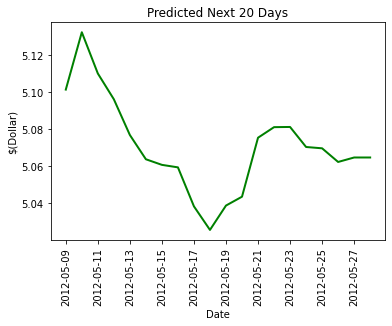

In [ ]:
plt.plot(ds1,color='green', lw=2)
plt.title("Predicted Next 20 Days")
plt.xlabel('Date')
plt.ylabel('$(Dollar)')
plt.xticks(rotation='vertical')

Text(0, 0.5, '$(Dollar)')

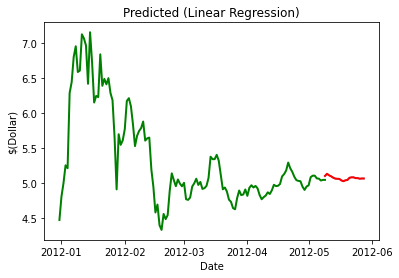

In [ ]:
plt.plot(ds1,)
plt.plot(ds['Price'],color='green', lw=2, label='Bitcoin Data')
plt.plot(ds1['Price'],color='red', lw=2, label='Predicted')
plt.title("Predicted (Linear Regression)")
plt.xlabel('Date')
plt.ylabel('$(Dollar)')
